In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate

### Homework 3.2 - Convolution

In this homework, we will study the effect of convolution between two functions. However, we are taking the numerical approach, our answer may behave differently from the theory around the boundary if we do not have sufficient number of steps. To reduce the problem, we will use steps = 10,000.

In [30]:
steps = 10000

I have defined the following functions: 

$dd(x)$, which is an approximation of the diract delta function using Gaussian distributiion function. This is not as nearly good as the real diract delta function but should be sufficient for the problem we are doing when $\sigma$ is small.

$f(x)$ is the diract delta function repeats 5 times.

$tooth(x)$ is a half triangle function.

In [31]:
def dd(x, loc=0, sigma=0.01):
    return math.exp(-0.5 / sigma * (x - loc)**2.) / math.sqrt(2*math.pi) / sigma

def f(x):
    return dd(x, 0) + dd(x, -5) + dd(x, 5) + dd(x, -10) + dd(x, 10)

def tooth(x):
    return (x + 2.2) if abs(x) < 2.2 else 0

Let's plot $f(x)$ and $tooth(x)$.

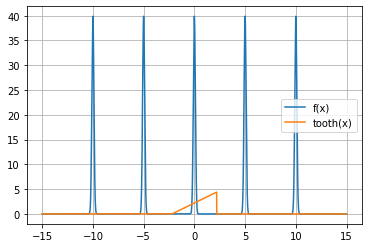

In [32]:
x = np.linspace(-15, 15, steps)
y_f = np.array([f(e) for e in x])
y_saw = [tooth(e) for e in x]

plt.plot(x, y_f, label='f(x)')
plt.plot(x, y_saw, label='tooth(x)')
plt.legend()
plt.grid()
plt.show()

**Q1: Find the convolution between $f(x)$ and $tooth(x)$ functions by plotting the answer out**, i.e.:

$$
f(x) * g(x) =\int^\infty_{-\infty}{f(x) g(t-x)}{dx}
$$

Keep in mind that you are not able to perform this integral from and to infinity so as long as the limit are sufficiently large, it should be ok. Also make sure to use sufficiently large number of steps because the $f(x)$ has sharp peaks and we cannot actually perform continuous integration on computer.

In [67]:
def convolution(t, f=f, g=tooth, T=15):
    return integrate.quad(lambda x: f(x)*g(t-x), -T, T)[0]

ys = [convolution(t) for t in x]
yinf = [convolution(t, T=float('inf')) for t in x]
y150 = [convolution(t, T=150) for t in x]

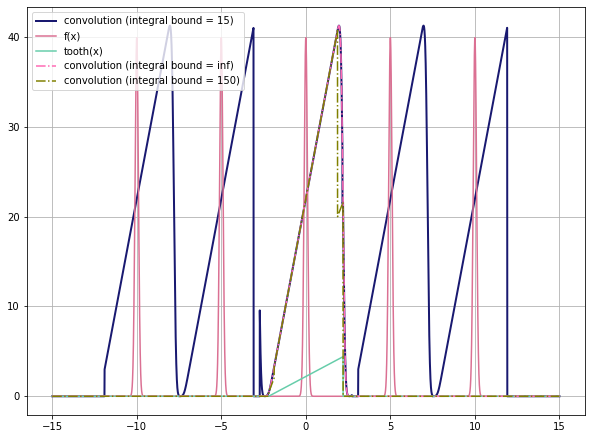

In [83]:
%matplotlib inline

plt.figure(figsize=(10,7.5))
plt.plot(x, ys, label='convolution (integral bound = 15)', color='midnightblue', lw=2)
plt.plot(x, y_f, label='f(x)', color='palevioletred')
plt.plot(x, y_saw, label='tooth(x)', color='mediumaquamarine')
plt.plot(x, yinf, '-.', label='convolution (integral bound = inf)', color='hotpink')
plt.plot(x, y150, '-.', label='convolution (integral bound = 150)', color='olive')
plt.grid()
plt.legend()

**Q2: Can you explain the effect of the convolution from what you learn during this homework?**

According to Google, colvolution is the change between the functions f and g as g moves across f.

It seems that if the integral bound is small (like 15), we notice that the function tooth has stretched vertically and repeated every interval of the function f.

However, as the integral bound is larger, the amount of repeats get decreased until the function is limited to the middle only (this might not be the effect of convolution itself, but the limitation of numerically calculating the integral).